## ボールを100m飛ばすのに必要な角度と速度は？

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark", {'grid.linestyle': '--'})

In [2]:
"""
空気抵抗無しver.
"""
def x_0(t,v,theta):
    # x軸変位
    return v*np.cos(theta)*t
def y_0(t,v,theta):
    # y軸変位
    return v*np.sin(theta)*t-1/2*g*t**2

"""
空気抵抗有りver.
"""
def x(t,m,k,v,theta):
    # x軸変位
    return m*v*np.cos(theta)*(1-np.exp(-k*t/m))/k
def y(t,m,k,v,theta):
    # y軸変位
    return m*v*np.sin(theta)/k*(1-np.exp(-k*t/m)) - m*g/k*(t-m/k*(1-np.exp(-k*t/m)))
def v_y(t,m,k,v,theta):
    # y軸方向速度
    return v*np.sin(theta)*np.exp(-k/m*t)-m*g/k*(1-np.exp(-k/m*t))


## 空気抵抗が無いときの軌跡

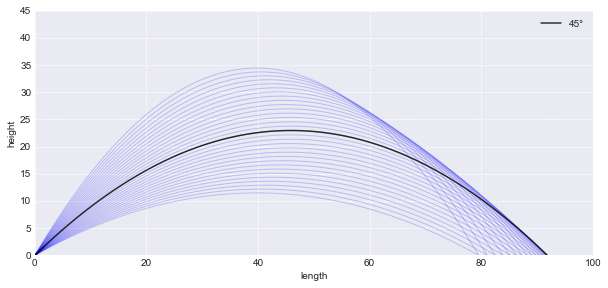

In [3]:
plt.figure(figsize=(10,4.5))
t = np.linspace(0,8,1001)
g = 9.8
v = 30
k = 0.25
for theta in range(30,61):
    plt.plot(x_0(t,v,theta*np.pi/180),y_0(t,v,theta*np.pi/180),color="blue",alpha=0.2,lw=1)
theta = 45
plt.plot(x_0(t,v,theta*np.pi/180),y_0(t,v,theta*np.pi/180),label="45°",color="black",alpha=0.8)
plt.ylim(0,45)
plt.xlim(0,100)
plt.ylabel("height")
plt.xlabel("length")
plt.grid()
plt.legend()
plt.savefig("figures/4-1_parabolla1.pdf")

## 空気抵抗有/無の飛び方比較

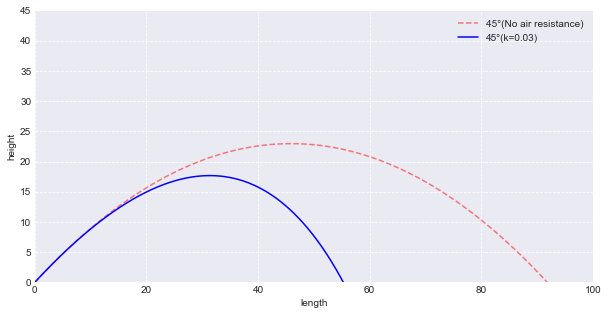

In [4]:
t = np.linspace(0,5,1001)
g = 9.8
v = 30
k = 0.030 # 空気抵抗の指数
m = 0.14  # kg
# 比較
plt.figure(figsize=(10,5))
theta = 45
plt.plot(x_0(t,v,theta*np.pi/180),y_0(t,v,theta*np.pi/180),"--",label="45°(No air resistance)",color="red",alpha=0.5)
plt.plot(x(t,m,k,v,theta*np.pi/180),y(t,m,k,v,theta*np.pi/180),label="45°(k=0.03)",color="blue")
plt.ylim(0,45)
plt.xlim(0,100)
plt.ylabel("height")
plt.xlabel("length")
plt.legend()
plt.grid()
plt.savefig("figures/4-2_parabolla2.pdf")


## どの角度で投げるのがよいか($v$固定)
- newton法を使って、ボールが落下する場所を求める
- 角度は30～50度ずつ0.5刻み

0.03 30 0.14


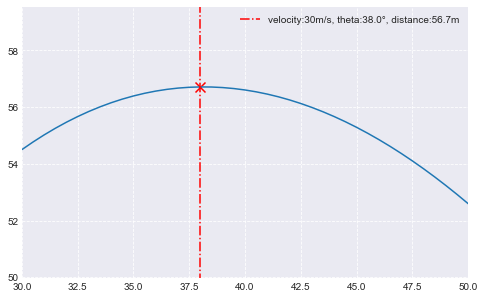

In [5]:
# Newton法
def Newton_y(k,m,v,theta):
    """
    v,k,theta固定で、y=0(ボールが落下する)時のtを求める
    """
    t = 30
    for i in range(100):
        y_t = y(t,m,k,v,theta)
        vy_t = v_y(t,m,k,v,theta)
        t -= y_t/vy_t
    return t


v = 30 # 初速30m/s
print(k,v,m)
plt.figure(figsize=(8,5))
# thetaを0.5°刻みで用意
thetas = np.linspace(30*np.pi/180,50*np.pi/180,41)
distances = np.zeros(len(thetas))    
for i,theta in enumerate(thetas):
    # 落ちた時間を求める
    t_drop = Newton_y(k,m,v,theta)
    # 落ちた場所をt_dropから求める
    x_drop = x(t_drop,m,k,v,theta)
    distances[i] = x_drop 
    # print(theta*180/np.pi,x_drop)
#最も良い角度 = 飛距離の最大値
thetas = thetas*180/np.pi #°に戻す
max_distance_index = distances.argmax()
message = "velocity:{}m/s, theta:{:.1f}°, distance:{:.1f}m".format(v, thetas[max_distance_index],distances.max())
plt.plot(thetas, distances)
plt.plot([thetas[max_distance_index],thetas[max_distance_index]],[0,100],"-.",color="r",label=message)
plt.scatter(thetas[max_distance_index],distances.max(),color="r",marker="x",s=100)
plt.xlim(30,50)
plt.ylim(distances.min()*0.95,distances.max()*1.05)
plt.legend()
plt.grid()
plt.savefig("figures/4-3_angle-dist.pdf")

## Newton法でボールが落ちる場所を求める
1. 速度を100km/hから200km/hまで用意
2. その速度で最大距離となる角度を算出
3. 最大距離を求め、ホームランに足る距離(d_homerun)を超えているかを確認

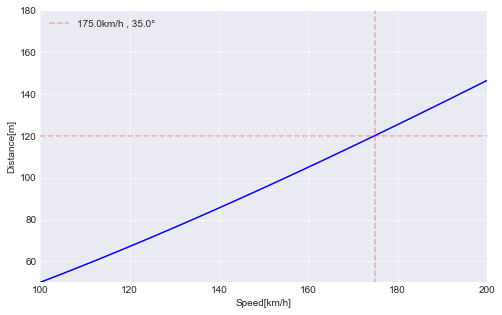

In [6]:
vs = np.linspace(100,200,101)
xs = []
flg = True
d_homerun = 120
for v in vs:
    v /= 3.6
    # 落ちた時間を求める
    thetas = np.linspace(30*np.pi/180,50*np.pi/180,41)
    distances = np.zeros(len(thetas))   
    for i,theta in enumerate(thetas):
        # 落ちた時間を求める
        t_drop = Newton_y(k,m,v,theta)
        # 落ちた場所をt_dropから求める
        x_drop = x(t_drop,m,k,v,theta)
        distances[i] = x_drop
    if flg and distances.max() > d_homerun:
        v_homerun = v*3.6
        dist_homerun = distances.max()
        theta_homerun = thetas[distances.argmax()]*180/np.pi
        flg = False
    xs.append(distances.max())
plt.figure(figsize=(8,5))
plt.plot(vs, xs,"-",color="blue")
plt.plot([100,220],[d_homerun,d_homerun],"--",color="red",alpha=0.3)
# 目安ライン
plt.plot([v_homerun,v_homerun],[0,200],"--",color="red",alpha=0.3,label="{}km/h , {:.1f}°".format(v_homerun,theta_homerun))
plt.xlim(100,200)
plt.ylim(50,180)
plt.xlabel("Speed[km/h]")
plt.ylabel("Distance[m]")
plt.legend()
plt.grid()
plt.savefig("figures/4-4_distance.pdf")